 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plot
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_path = Path('Resources/whale_returns.csv')
whale_returns_df = pd.read_csv(whale_returns_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_returns_df.sort_index(inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df.dropna(inplace=True)

#check no nulls
whale_returns_df.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_path = Path('Resources/algo_returns.csv')
algo_returns_df = pd.read_csv(algo_returns_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_returns_df.sort_index(inplace=True)
algo_returns_df.head(5)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df.dropna(inplace=True)

#check no nulls
algo_returns_df.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_path = Path('Resources/sp500_history.csv')
sp500_history_df = pd.read_csv(sp500_history_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_history_df.sort_index(inplace=True)
sp500_history_df.head(5)

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history_df['Close'] = pd.to_numeric(sp500_history_df['Close'].str.replace("$","",regex=False))
sp500_history_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [11]:
# Calculate Daily Returns
sp500_daily_returns_df = sp500_history_df.pct_change()
sp500_daily_returns_df.sort_index(inplace=True)
sp500_daily_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_daily_returns_df.dropna(inplace=True)

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns_df.columns = ['SP500']
sp500_daily_returns_df.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
daily_returns = pd.concat([whale_returns_df,algo_returns_df,sp500_daily_returns_df], axis='columns', join='inner')
daily_returns.sort_index()
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns Comparison'}, xlabel='Date'>

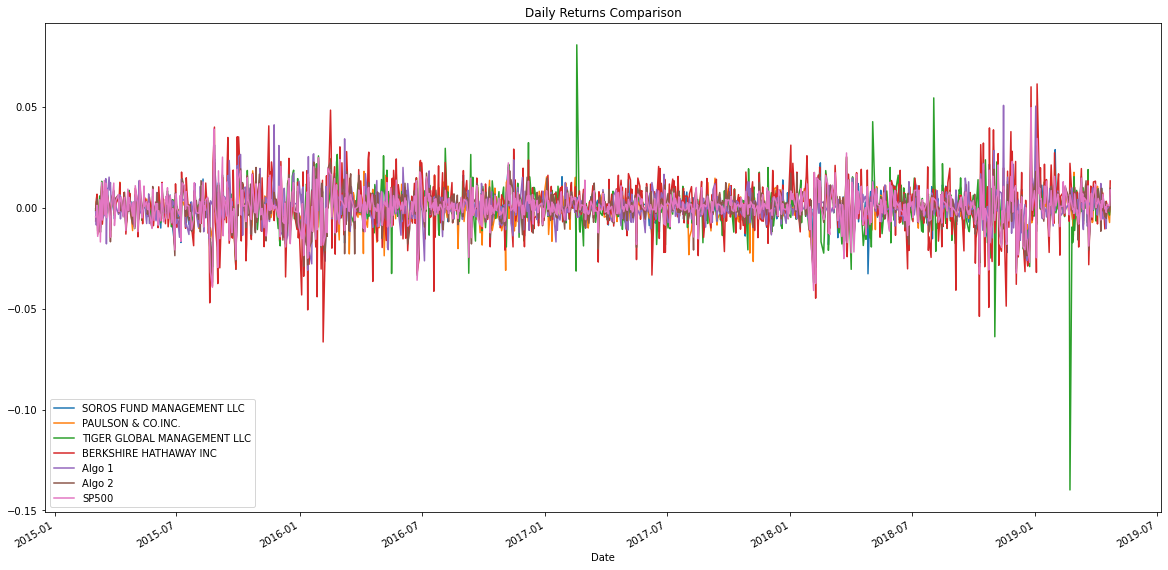

In [15]:
# Plot daily returns of all portfolios
daily_returns.plot(figsize=[20,10], title="Daily Returns Comparison")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns Comparison'}, xlabel='Date'>

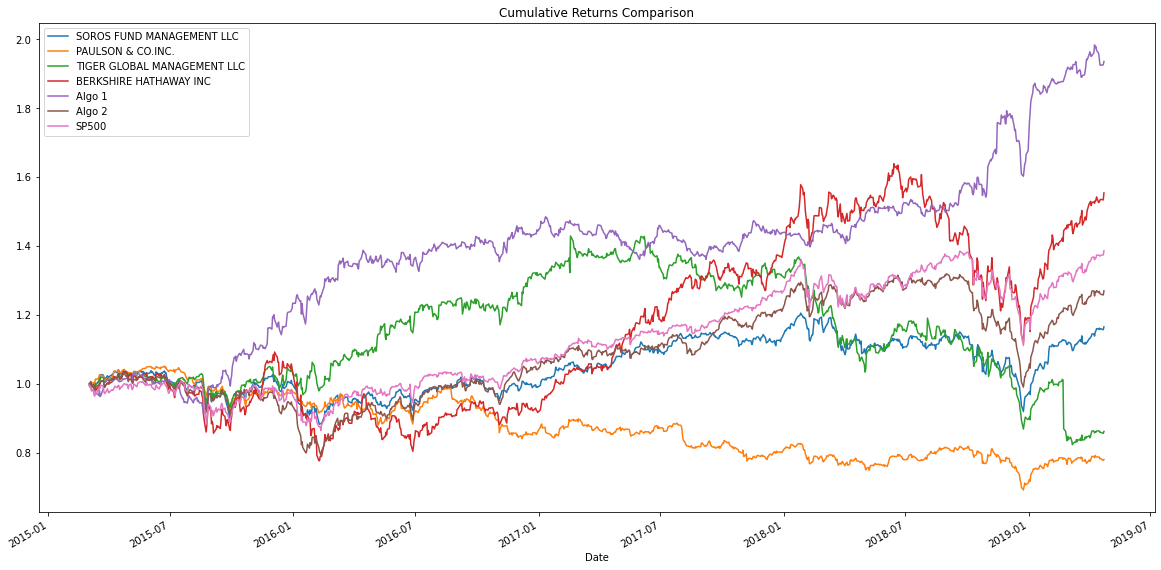

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (daily_returns + 1).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=[20,10], title="Cumulative Returns Comparison")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Risk'}>

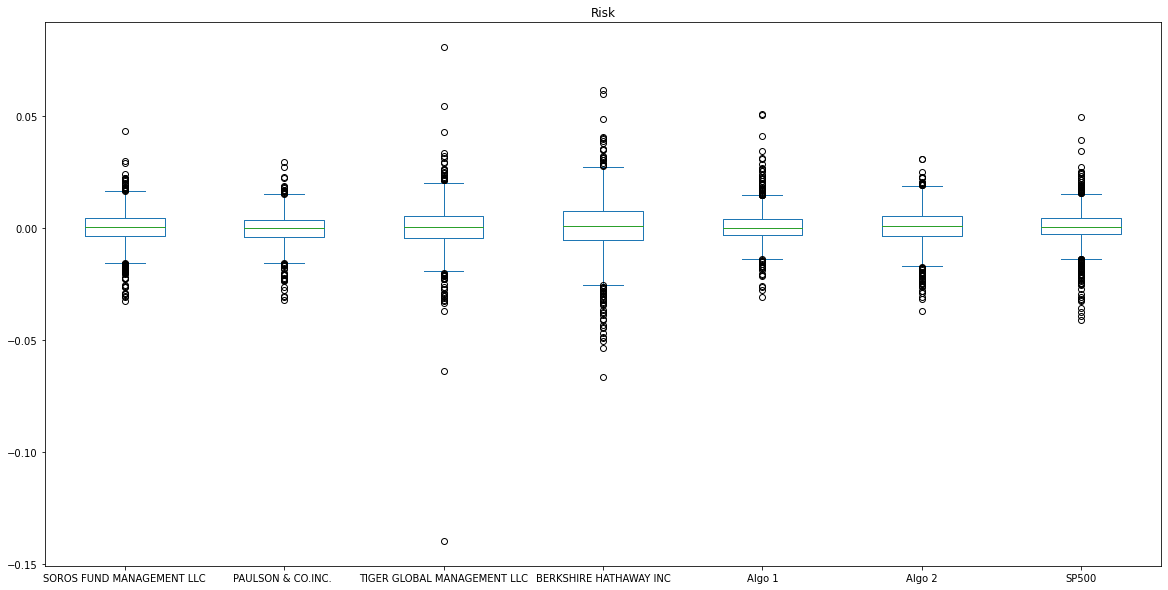

In [17]:
# Box plot to visually show risk
daily_returns.plot(kind="box", figsize=[20,10], title="Risk")

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_std = daily_returns.std()
daily_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Sort standard deviation in desc ordert
daily_std.sort_values(ascending=False, inplace=True)

# Determine which portfolios are riskier than the S&P 500
daily_std[daily_std > daily_std['SP500']]

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
dtype: float64

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head(7)

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SP500                          0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Std'}, xlabel='Date'>

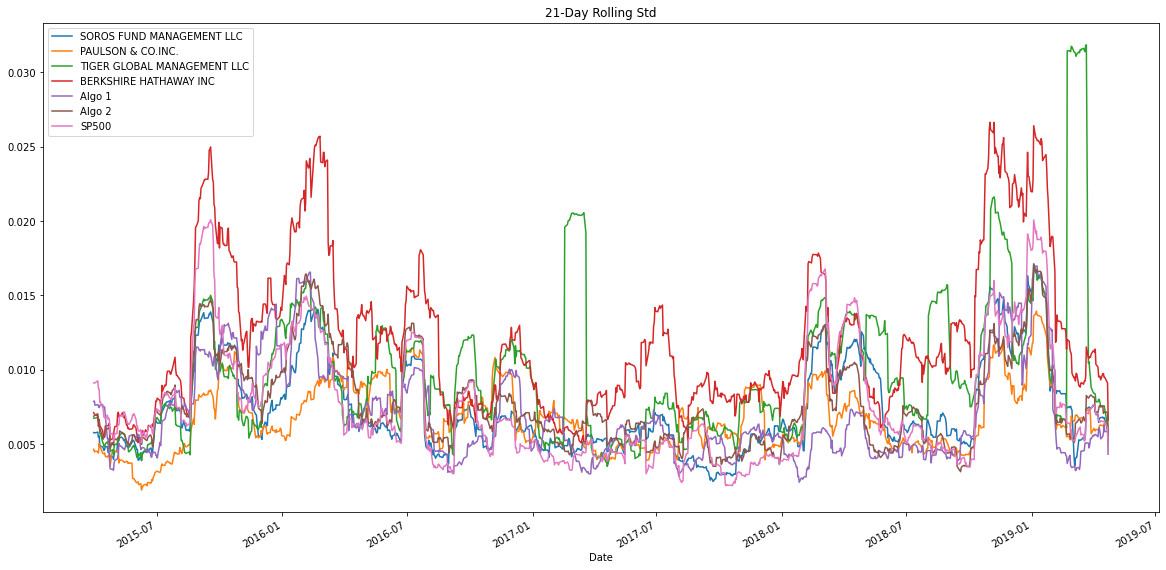

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21_std = daily_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_21_std.plot(figsize=[20,10], title="21-Day Rolling Std")

### Calculate and plot the correlation

<AxesSubplot:>

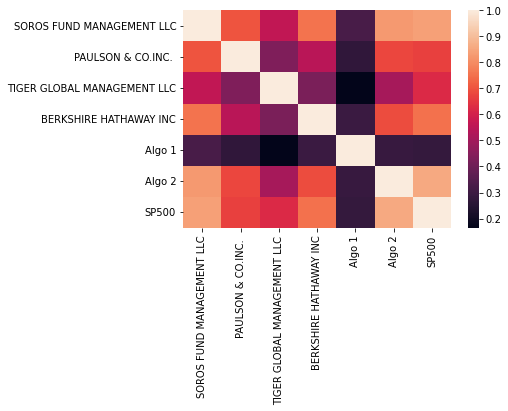

In [22]:
# Calculate the correlation
correlation = daily_returns.corr()

# Display de correlation matrix
sns.heatmap(correlation)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [23]:
# Calculate covariance of a single portfolio
algo_2_covariance = daily_returns['Algo 2'].cov(daily_returns['SP500'])

# Calculate variance of S&P 500
sp500_variance = daily_returns['SP500'].var()

# Computing beta
algo_2_beta = algo_2_covariance/sp500_variance

### Plot beta trend

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Algo 2'}, xlabel='Date'>

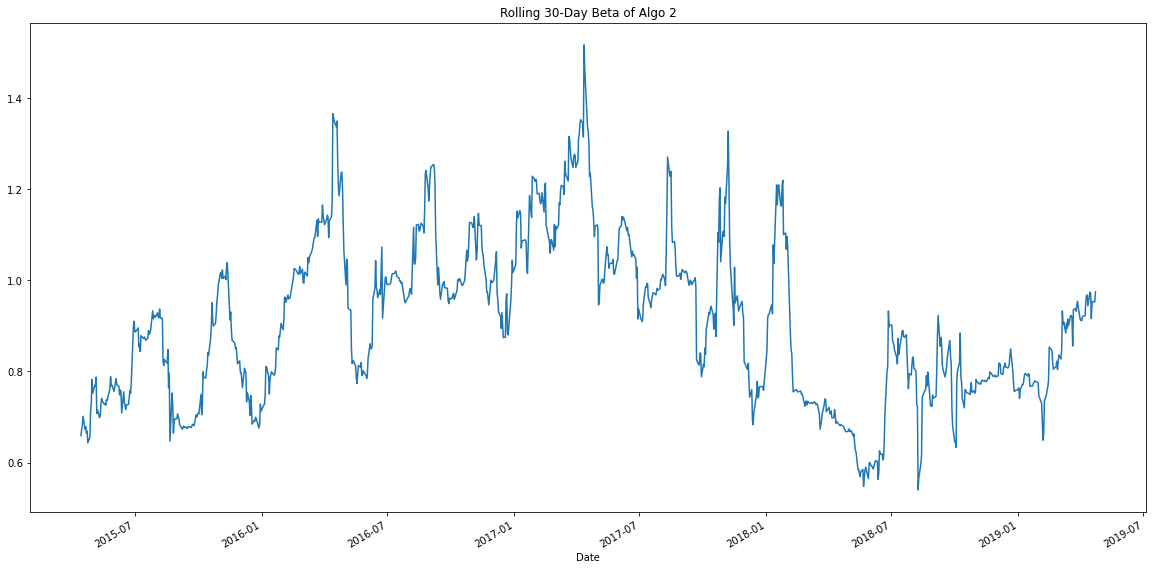

In [24]:
# Calculate 30-day rolling covariance of Algo 2 vs. S&P 500
algo_2_rolling_covariance = daily_returns['Algo 2'].rolling(window=30).cov(daily_returns['SP500'])

# Calculate 30-day rolling variance of S&P 500 
sp500_rolling_variance = daily_returns['SP500'].rolling(window=30).var()

# Calculate 30-day rolling beta of Algo 2 and plot the data
algo_2_rolling_beta = algo_2_rolling_covariance / sp500_rolling_variance
algo_2_rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Algo 2')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'21-Day Exponentially Weighted Average of Std'}, xlabel='Date'>

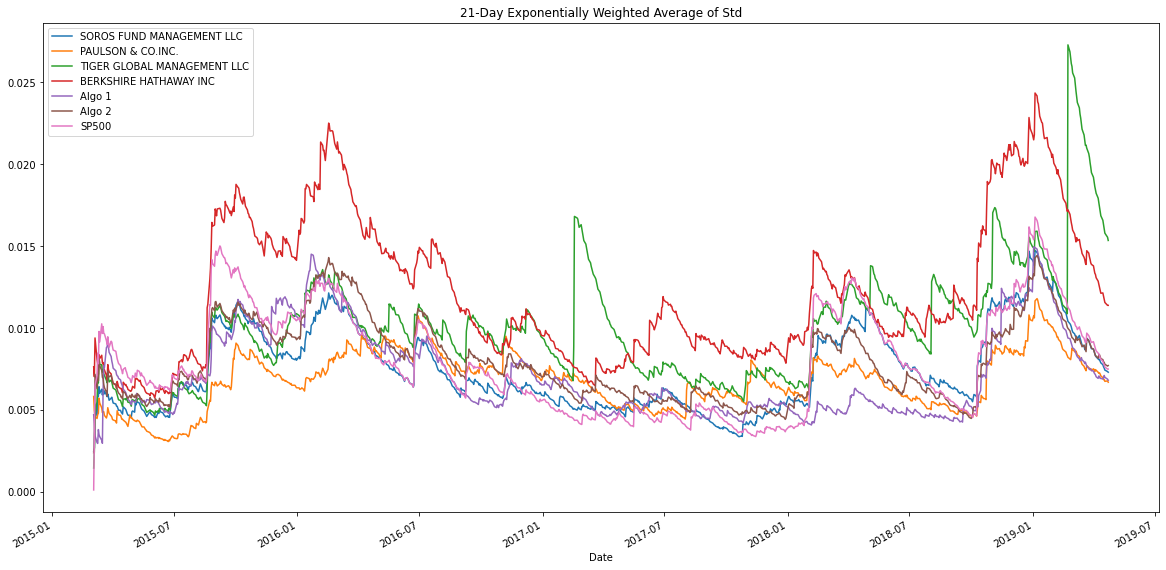

In [25]:
# Use `ewm` to calculate the rolling window
daily_returns.ewm(halflife=21).std().plot(figsize=[20,10], title="21-Day Exponentially Weighted Average of Std")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = (daily_returns.mean()/daily_returns.std()) * np.sqrt(252)
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

<AxesSubplot:>

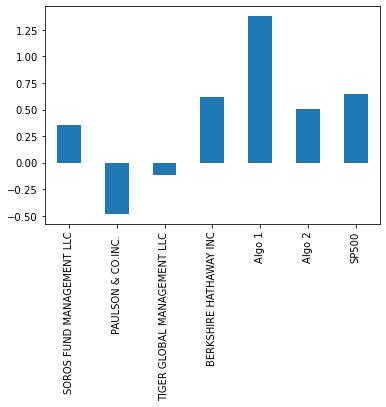

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algoritmic strategies sometimes outperform the market and other whales portfolios 
- The algo1 portfolio had the best commulative returns but algo2 was forth (behind SP500 and Berkshire Hathaway)
- In terms of risk, algo1 is also with the minimum risk compared to other portfolios, algo2 is not the lowest but it is still relatively low
- In terms of colleration algo1 is not collarated to the other portfolios while algo2 has high correlation to all the othe rportfolios

In conclution - Algo 1 is a superior portfolio, performing better that all other portfolios and S&P 500 with lower risk. Algo 2 on the other hand is average compared to the other portfolios 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Reading data from Apple stock
aapl_path = Path('Resources/aapl_historical.csv')
aapl_historical_df = pd.read_csv(aapl_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)

aapl_historical_df.sort_index(inplace=True)

aapl_historical_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [29]:
# Reading data from Google stock
goog_path = Path('Resources/goog_historical.csv')
goog_historical_df = pd.read_csv(goog_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)

goog_historical_df.sort_index(inplace=True)

goog_historical_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [30]:
# Reading data from Cost stock
cost_path = Path('Resources/cost_historical.csv')
cost_historical_df = pd.read_csv(cost_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)

cost_historical_df.sort_index(inplace=True)

cost_historical_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [31]:
# Combine all stocks in a single DataFrame and sort
all_prices = pd.concat([aapl_historical_df,goog_historical_df, cost_historical_df], axis="rows", join="inner")
all_prices = all_prices.reset_index()
all_prices = all_prices.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
all_prices.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [32]:
# Calculate daily returns
all_returns = all_prices.pct_change()

# Drop NAs
all_returns.dropna(inplace=True)

# Display sample data
all_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = all_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:
#prepare the new column name for my portfolio
new_columns = daily_returns.columns.tolist()
new_columns.append("My Portfolio")

# Join your returns DataFrame to the original returns DataFrame
daily_returns_new = pd.concat([daily_returns,portfolio_returns],axis="columns",join="inner")
daily_returns_new.columns = new_columns

daily_returns_new.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,My Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [35]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
daily_returns_new.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized `std`

daily_std_new = daily_returns_new.std()

annualized_std_new = daily_std_new * np.sqrt(252)
annualized_std_new.head(8)

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
SP500                          0.152054
My Portfolio                   0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Std with My Portfolio'}>

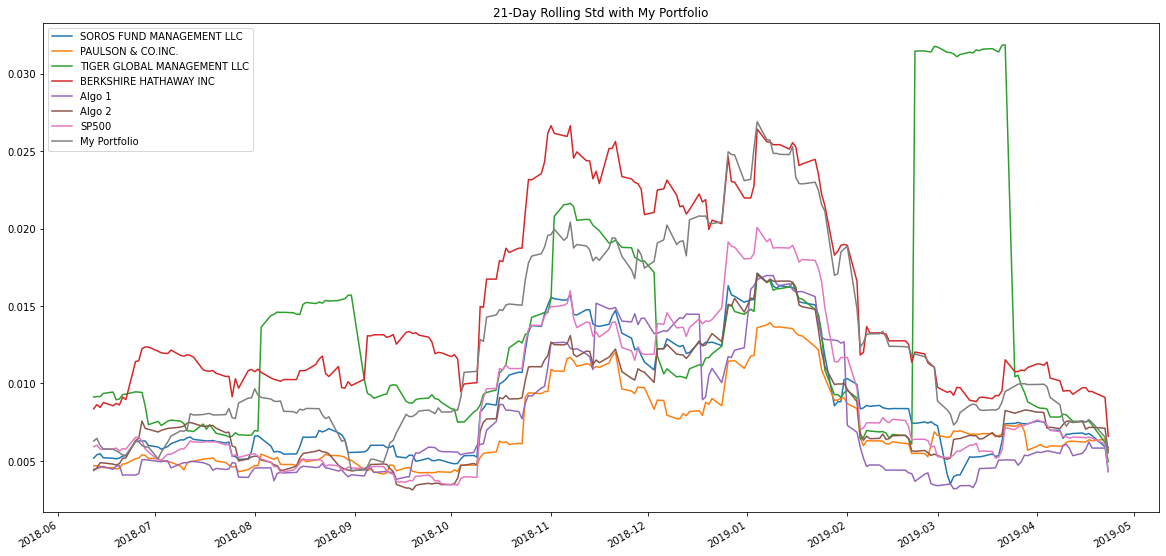

In [37]:
# Calculate rolling standard deviation
rolling_21_std_new = daily_returns_new.rolling(window=21).std()

# Plot rolling standard deviation
rolling_21_std_new.plot(figsize=[20,10], title="21-Day Rolling Std with My Portfolio")

### Calculate and plot the correlation

<AxesSubplot:>

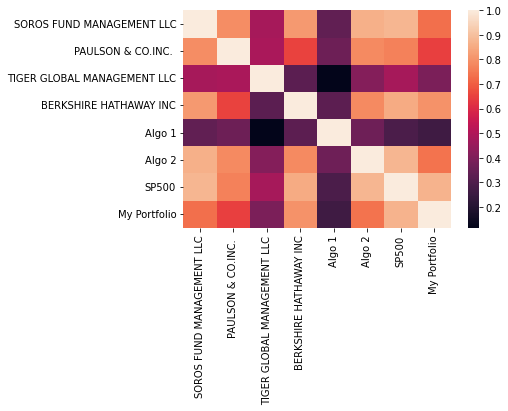

In [38]:
# Calculate and plot the correlation
correlation_new = daily_returns_new.corr()

sns.heatmap(correlation_new)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio'}>

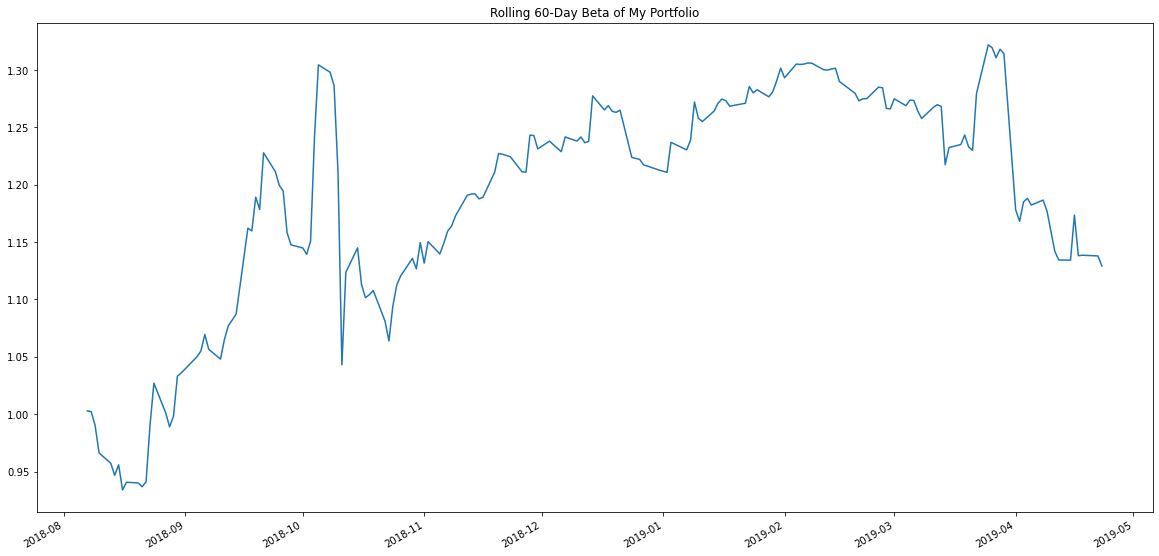

In [39]:
# Calculate and plot Beta:
# Calculate 60-day rolling covariance of My Portfolio vs. S&P 500
my_port_rolling_covariance = daily_returns_new['My Portfolio'].rolling(window=60).cov(daily_returns_new['SP500'])

# Calculate 60-day rolling variance of S&P 500 
sp500_rolling_variance_new = daily_returns_new['SP500'].rolling(window=60).var()

# Calculate 60-day rolling beta of My Portfolio and plot the data
my_port_rolling_beta = my_port_rolling_covariance / sp500_rolling_variance_new
my_port_rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_new = (daily_returns_new.mean()/daily_returns_new.std()) * np.sqrt(252)
sharpe_ratios_new

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
SP500                          0.584820
My Portfolio                   0.933123
dtype: float64

<AxesSubplot:>

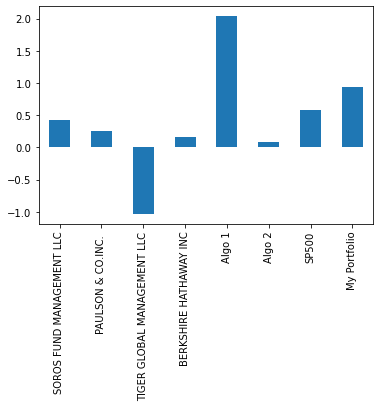

In [41]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_new.plot(kind="bar")

<AxesSubplot:title={'center':'Cumulative Returns Comparison with my portfolio'}>

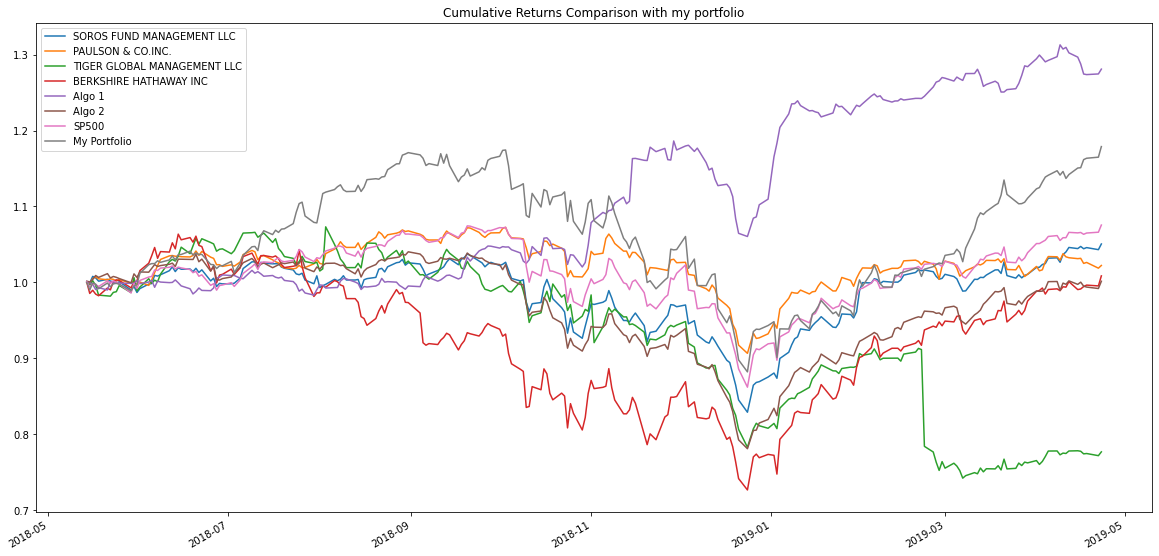

In [42]:
# Calculate cumulative returns of all portfolios
cumulative_returns_new = (daily_returns_new + 1).cumprod()

# Plot cumulative returns
cumulative_returns_new.plot(figsize=[20,10], title="Cumulative Returns Comparison with my portfolio")

### How does your portfolio do?

- My portfolio is still not beating Algo 1, but if we exclude Algo 1:
    - The commulative returns and the sharpe ratios are still better than all the other portfolios
    - The risk level is higher than some other portfolios but lower than others
    - The correlation to other portfolios is still relatively high
    
- Overall it's a good portfolio with great returns but not with the lowest risk